In [49]:
from idlelib.pyparse import trans
from sre_parse import State

import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.synthesis import TwoQubitWeylDecomposition
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_histogram

In [50]:
def cartanCircuit(VCxGate, transGate):
    circ = QuantumCircuit(2)
    phi = np.arctan(1 + np.sqrt(3))

    
    #qubit 0 after VCx
    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)

    #qubit 1 after VCx
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.p(13 * np.pi / 16, 1)
    circ.x(1)
    circ.p(9 * np.pi / 16, 1)

    circ.barrier(0)
    circ.barrier(1)
    
    circ.append(VCxGate.decompose(), [0, 1])

    
    #qubit 0
    circ.p(15 * np.pi / 16, 0)
    circ.x(0)
    circ.p(3 * np.pi / 16, 0)
    circ.x(0)
    circ.z(0)
    circ.x(0)
    circ.ry(phi, 0)
    circ.x(0)

    #qubit 1
    circ.p(15 * np.pi / 16, 1)
    circ.x(1)
    circ.p(3 * np.pi / 16, 1)
    circ.x(1)
    circ.z(1)
    circ.x(1)
    circ.ry(phi, 1)
    circ.x(1)

    circ.append(transGate.conjugate(), [0])
    circ.append(transGate.conjugate(), [1])
    
    return circ

In [51]:
pi = np.pi
sqrt = np.sqrt
log = np.log

common_log_term = log(-1 / 6 * (-1) ** (1 / 4) * (sqrt(24 - 6 * sqrt(3)) + 1j * (3 + sqrt(3))))
common_factor = 3j + 1j * sqrt(3) + sqrt(6 * (4 - sqrt(3)))
denominator = 15 * pi - 4 * 1j * common_log_term

VCx = np.array([
    [
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator),
        0,
        0,
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator)
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        0,
        -(1 / 2) * (-1) ** (1 / 8) + (1 / 2) * (-1) ** (5 / 8),
        -(1 / 2) * (-1) ** (1 / 8) - (1 / 2) * (-1) ** (5 / 8),
        0
    ],
    [
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator) -
        ((-1) ** (5 / 8) * common_factor * (-30 * pi + 8 * 1j * common_log_term)) / (24 * denominator),
        0,
        0,
        -(((-1) ** (5 / 8) * common_factor * (30 * pi - 8 * 1j * common_log_term)) / (24 * denominator)) +
        (3 * (-1) ** (5 / 8) * (-30 * pi + 8 * 1j * common_log_term)) / (2 * common_factor * denominator)
    ]
], dtype=complex)


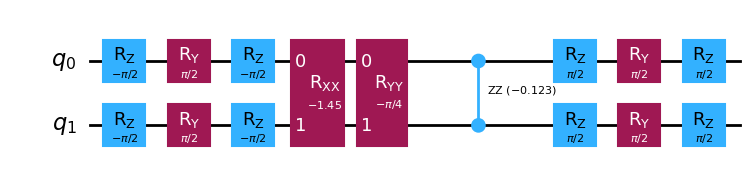

In [52]:
weylDecomCirc = TwoQubitWeylDecomposition(VCx)
VCxGate = weylDecomCirc.circuit()
VCxGate.draw('mpl')

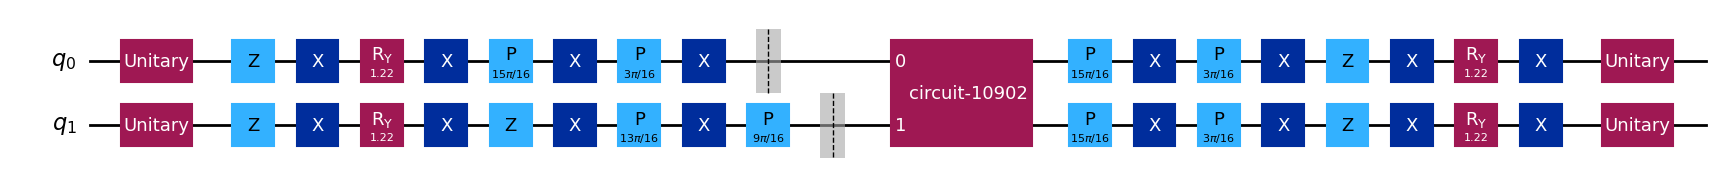

In [53]:
#basisTransformationMatrix = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])
basisTransformationMatrix = np.identity(2)
uniGate = UnitaryGate(basisTransformationMatrix)
cartanCirc = cartanCircuit(VCxGate, uniGate)
cartanCirc.draw('mpl')

In [54]:
Statevector(cartanCirc).draw('latex')

<IPython.core.display.Latex object>

In [55]:
Statevector(cartanCirc).to_operator().to_matrix().round(3)

array([[0.333+0.j, 0.333-0.j, 0.333+0.j, 0.   +0.j],
       [0.333+0.j, 0.333+0.j, 0.333+0.j, 0.   +0.j],
       [0.333-0.j, 0.333-0.j, 0.333+0.j, 0.   +0.j],
       [0.   -0.j, 0.   -0.j, 0.   -0.j, 0.   +0.j]])

In [56]:
Operator(cartanCirc).draw('latex')

<IPython.core.display.Latex object>

In [57]:
Operator(cartanCirc).to_matrix().round(3)

array([[ 0.577-0.j ,  0.577-0.j ,  0.577-0.j , -0.   -0.j ],
       [ 0.577-0.j , -0.289+0.5j, -0.289-0.5j,  0.   -0.j ],
       [ 0.577-0.j , -0.289-0.5j, -0.289+0.5j,  0.   -0.j ],
       [ 0.   -0.j ,  0.   +0.j ,  0.   -0.j ,  1.   -0.j ]])

In [58]:
Operator(uniGate).tensor(Operator(uniGate)).dot(cartanCirc).dot(Operator(uniGate.conjugate()).tensor(Operator(uniGate.conjugate()))).to_matrix().round(3)

array([[ 0.577-0.j ,  0.577-0.j ,  0.577-0.j , -0.   -0.j ],
       [ 0.577-0.j , -0.289+0.5j, -0.289-0.5j,  0.   -0.j ],
       [ 0.577-0.j , -0.289-0.5j, -0.289+0.5j,  0.   -0.j ],
       [ 0.   -0.j ,  0.   +0.j ,  0.   -0.j ,  1.   -0.j ]])

In [59]:
n = 3
listOfQudtis = [[i, i+1] for i in range(n)]
listOfQudtis

[[0, 1], [1, 2], [2, 3]]

In [60]:
def CZqutrit(transGate):
    circ = QuantumCircuit(4, name="CZ")
    
    circ.append(transGate, [0])
    circ.append(transGate, [1])
    circ.append(transGate, [2])
    circ.append(transGate, [3])
    omega = 2*np.pi/3
    
    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 3)
    circ.cp(-1 * omega, 1, 2)

    circ.append(transGate.conjugate().transpose(), [0])
    circ.append(transGate.conjugate().transpose(), [1])
    circ.append(transGate.conjugate().transpose(), [2])
    circ.append(transGate.conjugate().transpose(), [3])
    
    return circ

In [61]:
czqutrit = CZqutrit(uniGate)

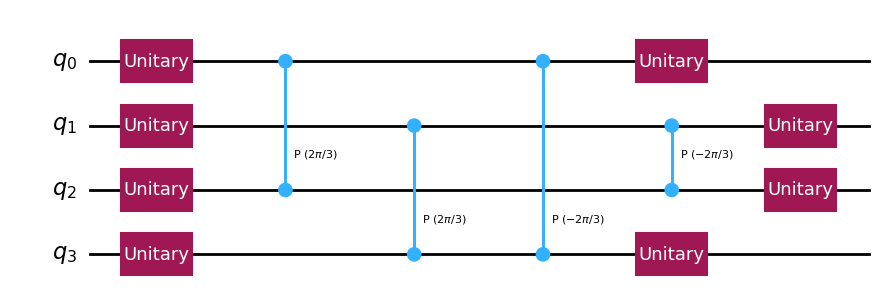

In [62]:
czqutrit.draw('mpl')

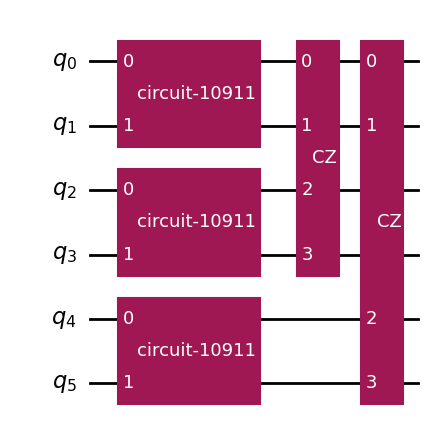

In [63]:
ghzcirc = QuantumCircuit(6)
ghzcirc.append(cartanCirc, [0, 1])
ghzcirc.append(cartanCirc, [2, 3])
ghzcirc.append(cartanCirc, [4, 5])
ghzcirc.append(czqutrit, [0, 1, 2, 3])
ghzcirc.append(czqutrit, [0, 1, 4, 5])

ghzcirc.draw('mpl')

In [64]:
from qiskit.quantum_info import Statevector
ghzState = Statevector(ghzcirc)
ghzMatrix = ghzState.data.reshape((64,1))

In [65]:
testWeyly = TwoQubitWeylDecomposition(Operator(cartanCirc).to_matrix())
optiF = testWeyly.circuit()

In [66]:
Statevector(optiF).draw('latex')

<IPython.core.display.Latex object>

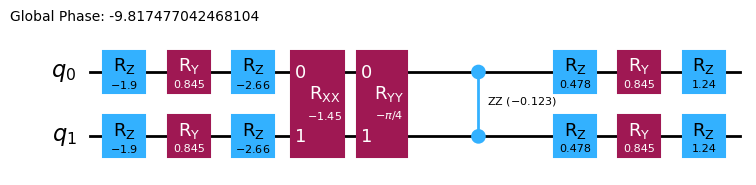

In [67]:
optiF.draw('mpl')

In [68]:
cartanCircH = Operator(cartanCirc).conjugate().transpose()

changeToDefault = cartanCircH.tensor(cartanCircH).tensor(Operator(np.identity(4))).to_matrix()

default = np.dot(changeToDefault, ghzMatrix)

In [69]:
Statevector(default).draw('latex')

<IPython.core.display.Latex object>

In [70]:
from qiskit.quantum_info import partial_trace

In [71]:
pt0 = partial_trace(ghzState, [2, 3, 4, 5])
pt1 = partial_trace(ghzState, [0, 1, 4, 5])
pt2 = partial_trace(ghzState, [0, 1, 2, 3])

In [72]:
pt0.draw('latex')

<IPython.core.display.Latex object>

In [73]:
pt1.draw('latex')

<IPython.core.display.Latex object>

In [74]:
pt2.draw('latex')

<IPython.core.display.Latex object>

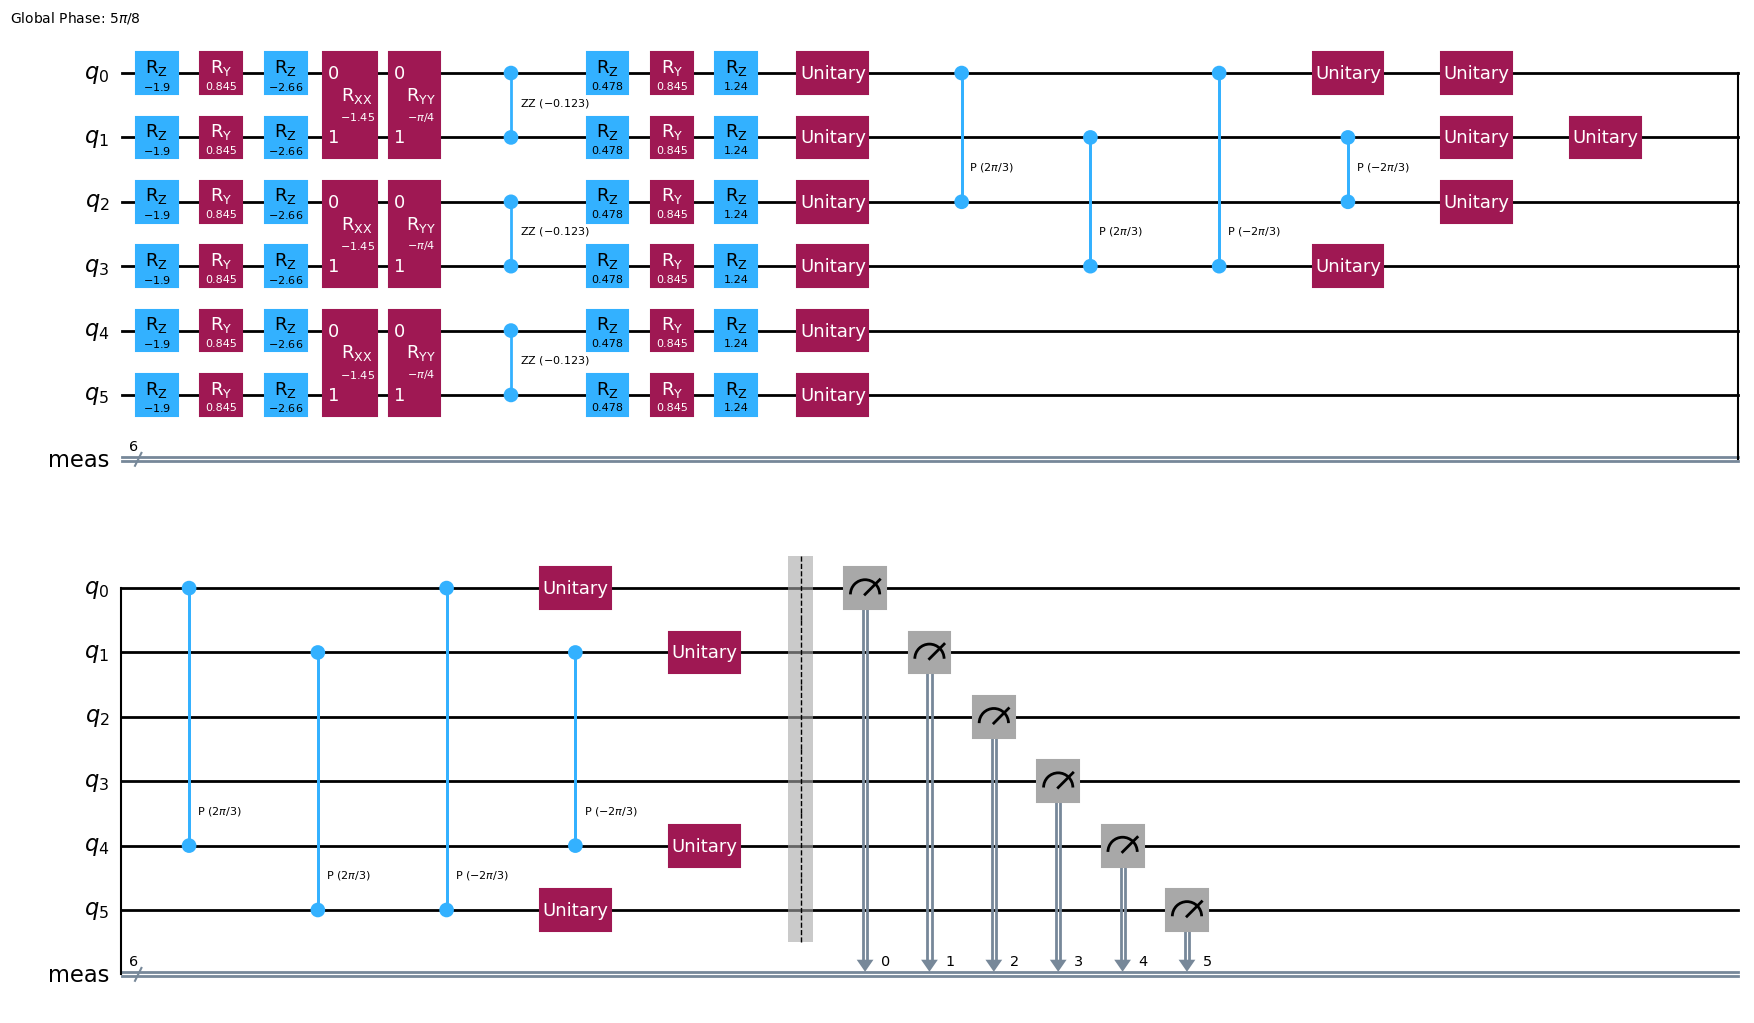

In [75]:
optiGHZ = QuantumCircuit(6)
optiGHZ.append(optiF, [0, 1])
optiGHZ.append(optiF, [2, 3])
optiGHZ.append(optiF, [4, 5])
optiGHZ.append(czqutrit, [0, 1, 2, 3])
optiGHZ.append(czqutrit, [0, 1, 4, 5])
optiGHZ.measure_all()
optiGHZ.decompose().draw('mpl')

In [76]:
optiGHZ.decompose().depth()

18

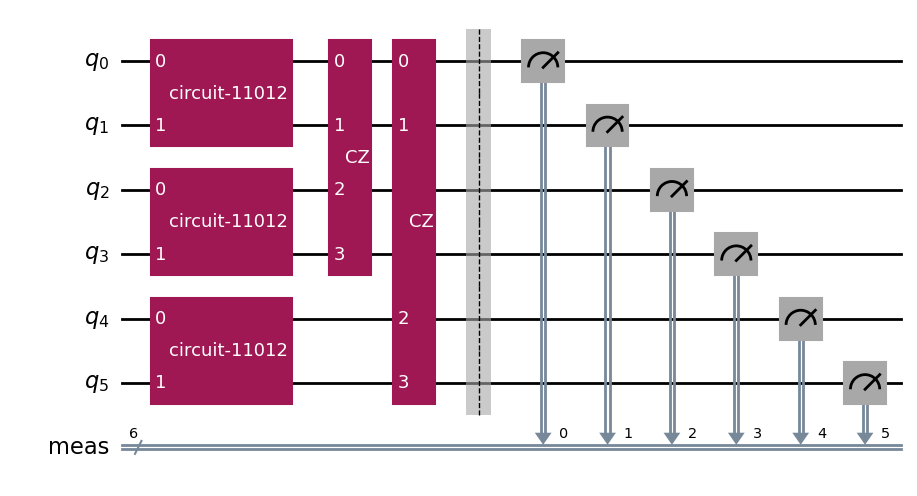

In [77]:
optiGHZ.draw('mpl')

In [78]:
newoptiGHZ = optiGHZ.copy()

newoptiGHZ.remove_final_measurements()

optiGhzState = Statevector(newoptiGHZ)
optiGhzMatrix = optiGhzState.data.reshape((64,1))

cartanCircH2 = Operator(optiF).conjugate().transpose()

changeToDefault = cartanCircH2.tensor(cartanCircH2).tensor(Operator(np.identity(4))).to_matrix()

default = np.dot(changeToDefault, optiGhzMatrix)

In [79]:
Statevector(default).draw('latex')

<IPython.core.display.Latex object>

In [80]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [81]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# 
# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance='ibm-q/open/main',
#     token=''
# )
# service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [82]:
# marrakesh
# torino
# brisbane

https://quantum.ibm.com/services/resources?tab=yours&resourceType  <-- link do dostepnych komputerow ibm 

https://docs.quantum.ibm.com/guides/native-gates <-- dostepne procesory na jakich bramkach dzialaja

In [83]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit_ibm_runtime.fake_provider import FakeTorino

In [84]:
backendBrisbane = FakeBrisbane()
backendTorino = FakeTorino()

In [85]:
targetBrisbane = backendBrisbane.target
targetTorino = backendTorino.target

In [86]:
pass_managerBrisbane = generate_preset_pass_manager(
    optimization_level=3, target=targetBrisbane
)

pass_managerTorino = generate_preset_pass_manager(
    optimization_level=3, target=targetTorino
)

In [87]:
transpiledBrisbane = pass_managerBrisbane.run(optiGHZ)

In [88]:
transpiledTorino = pass_managerTorino.run(optiGHZ)

In [89]:
transpiledBrisbane.depth()

100

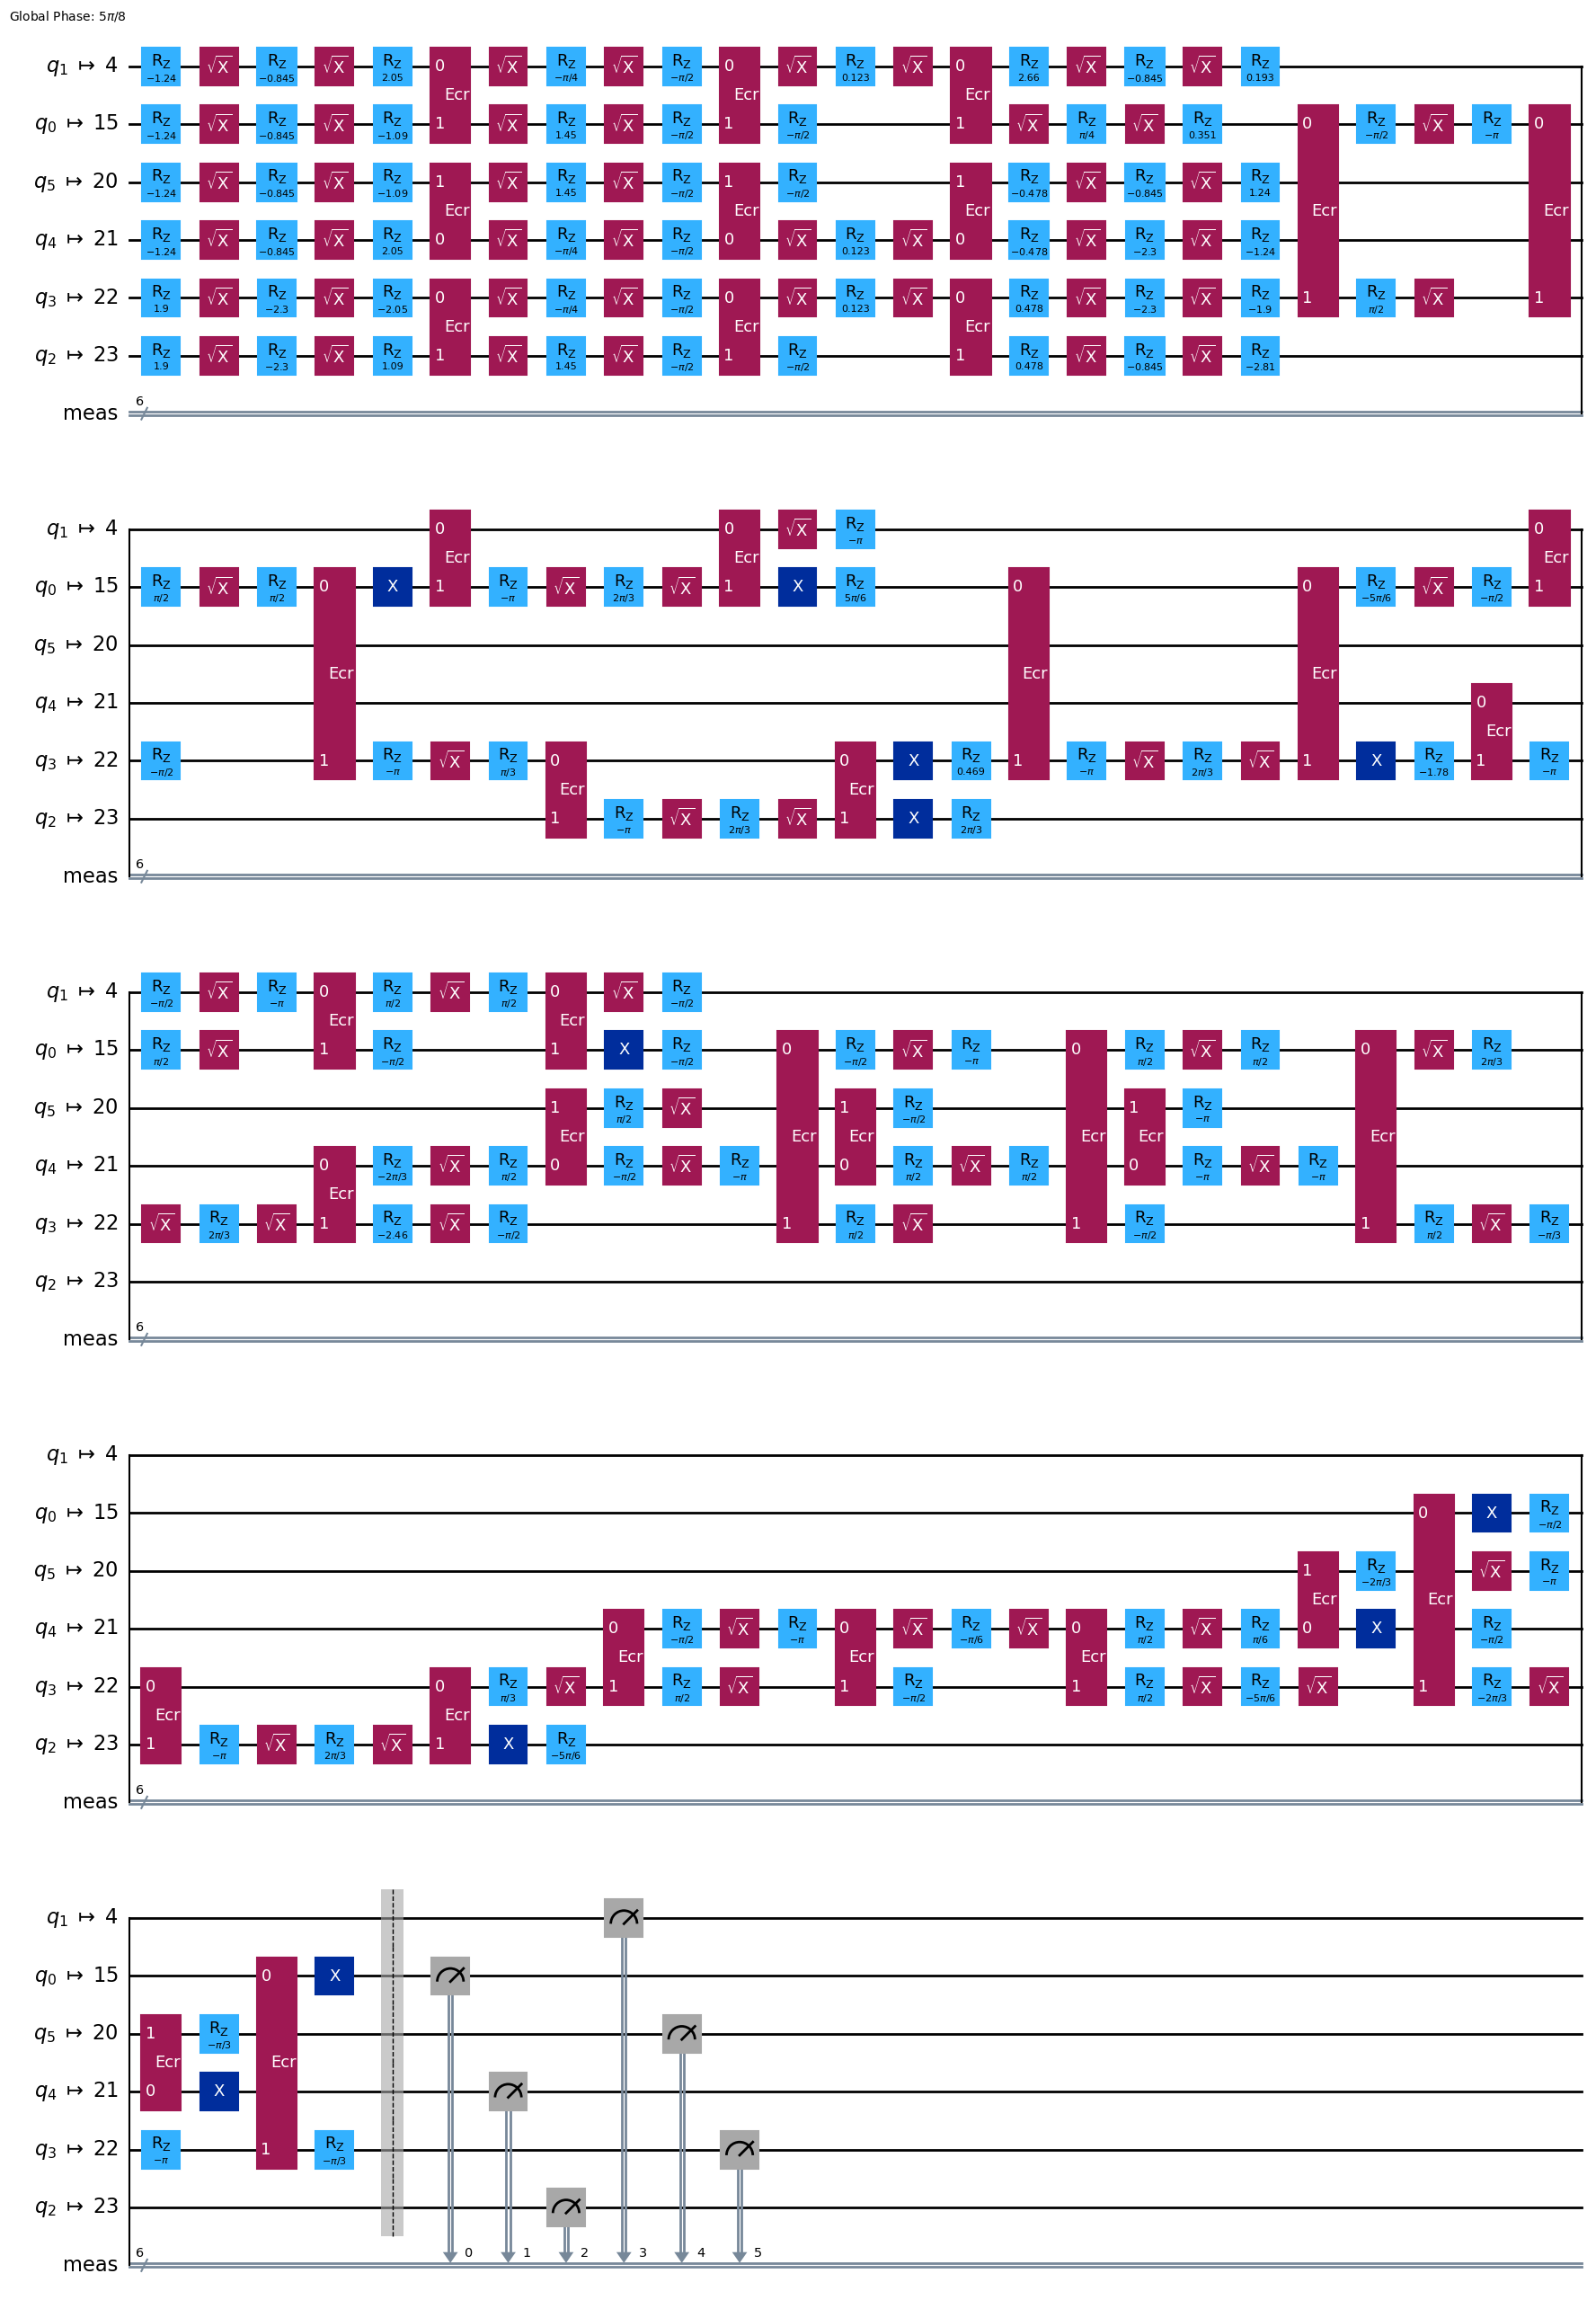

In [90]:
transpiledBrisbane.draw('mpl', idle_wires=False)

In [91]:
transpiledTorino.depth()

84

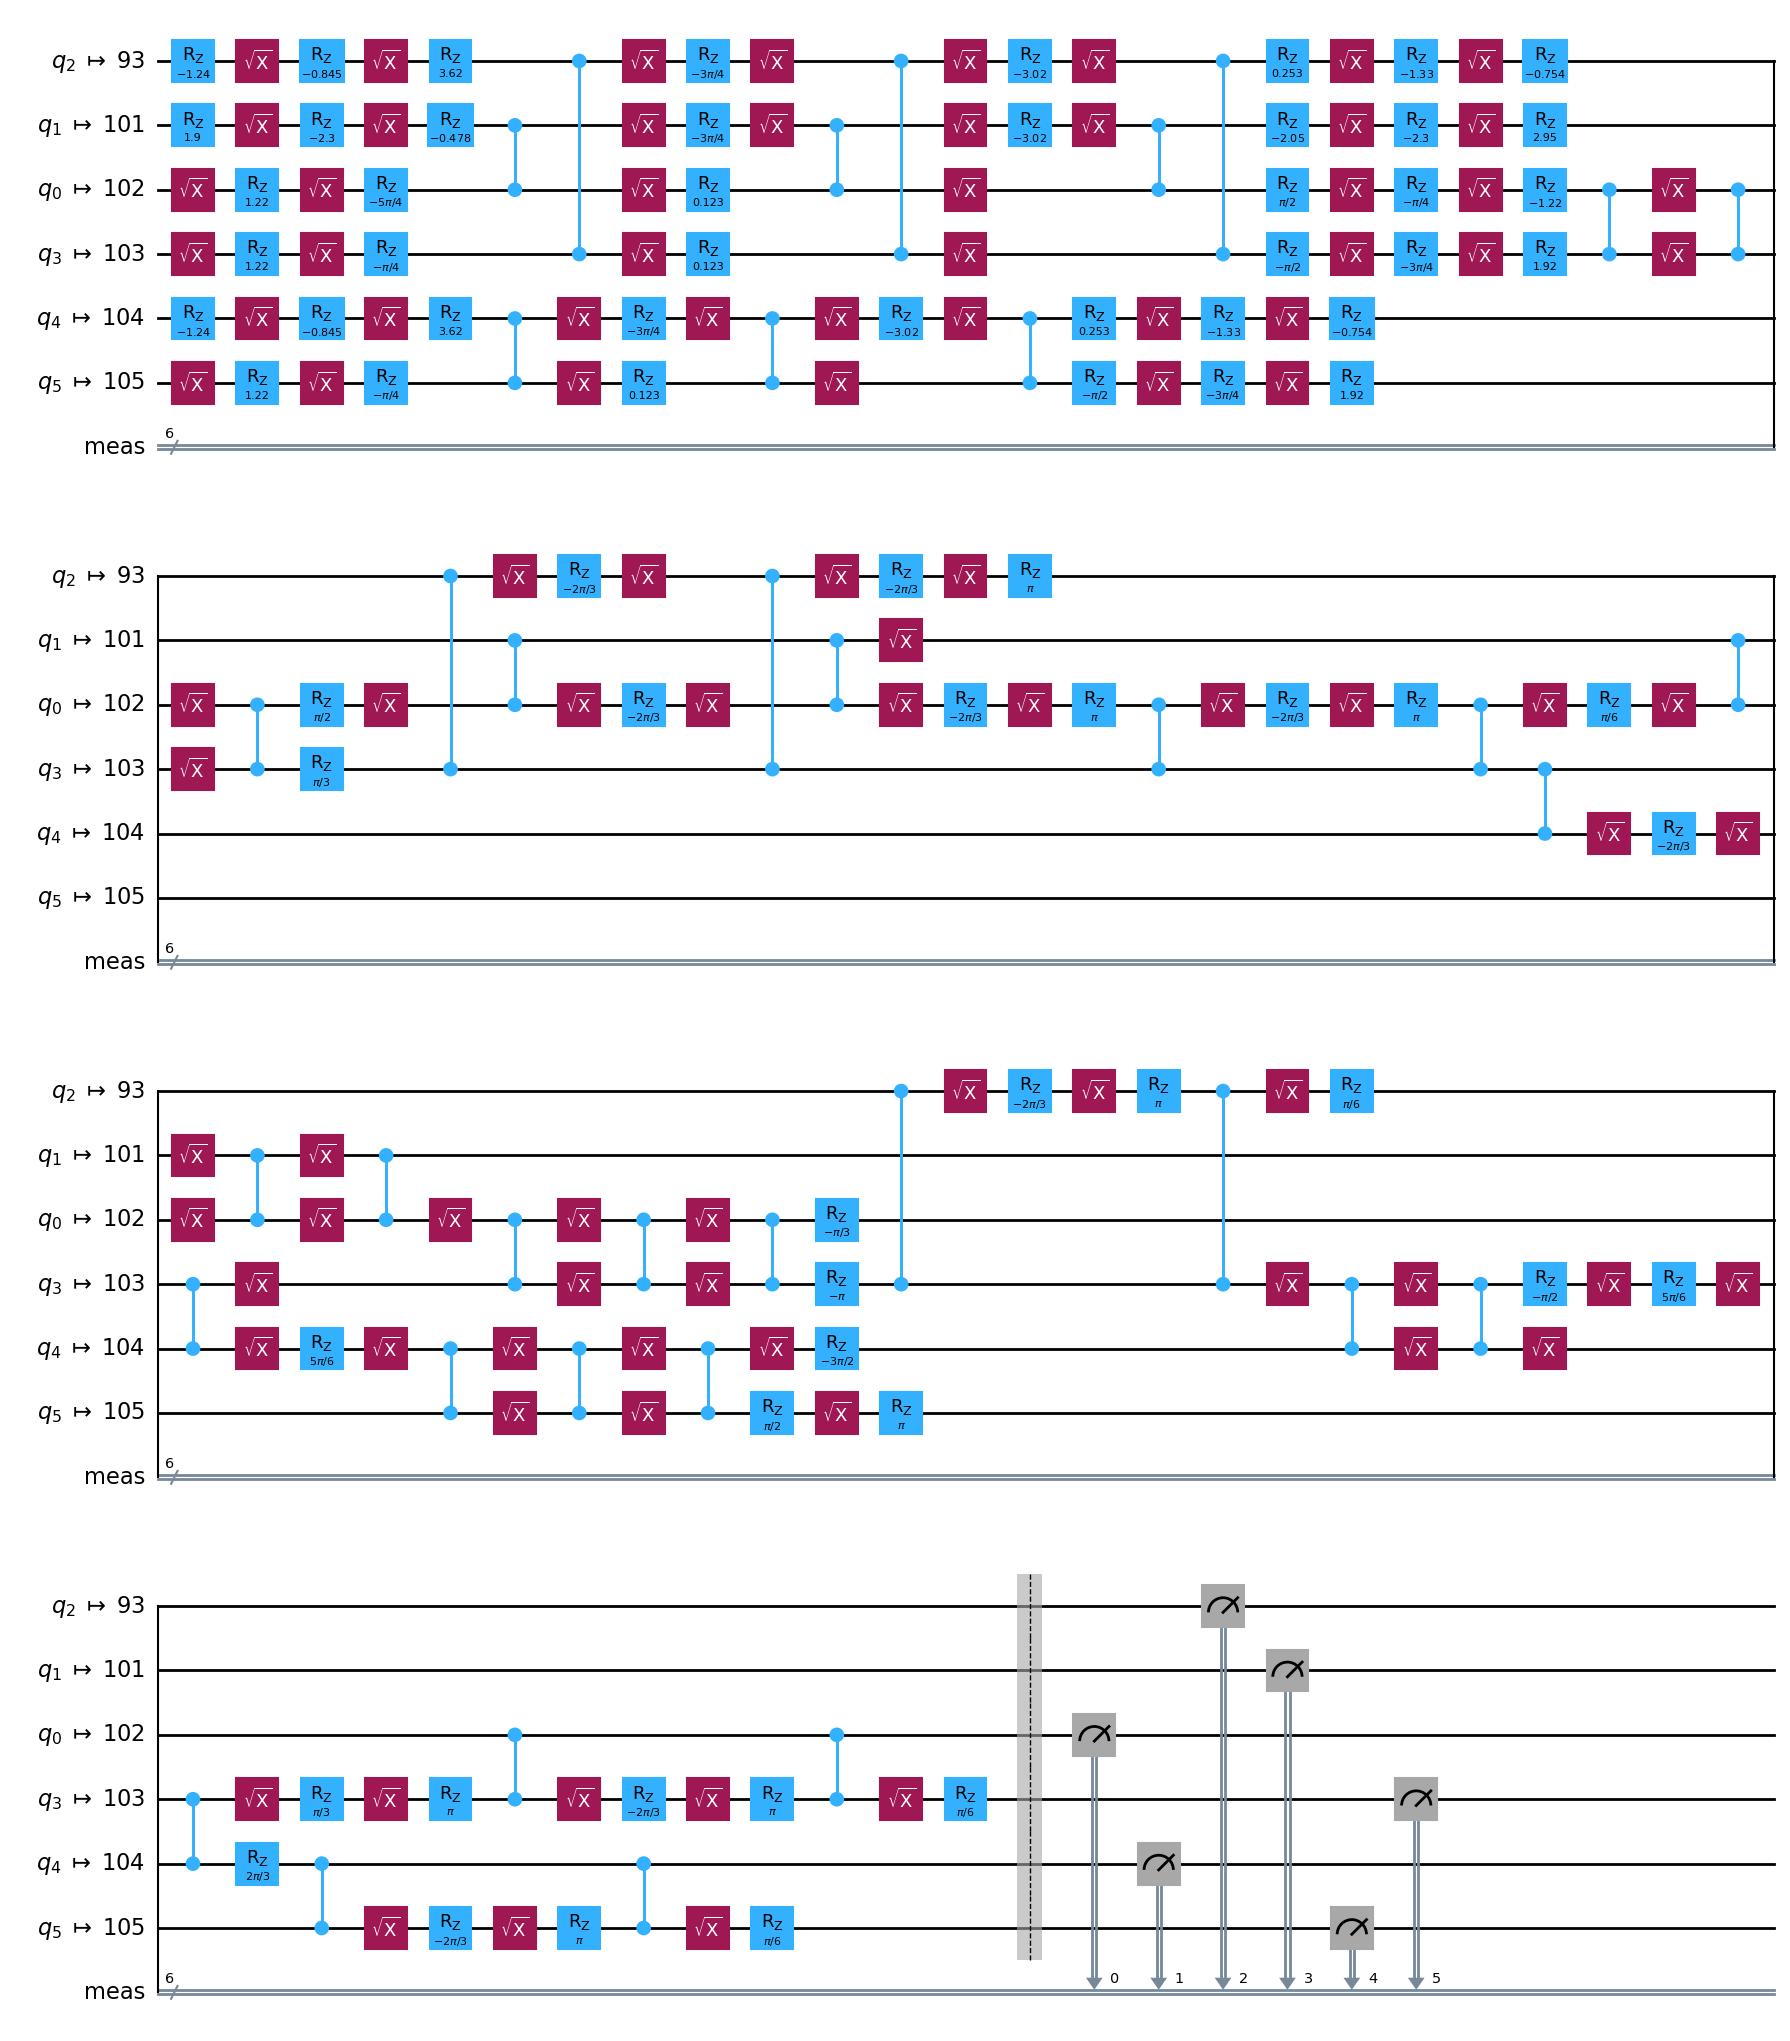

In [92]:
transpiledTorino.draw('mpl', idle_wires=False)

In [93]:
distrib = Statevector.from_instruction(newoptiGHZ).probabilities_dict()

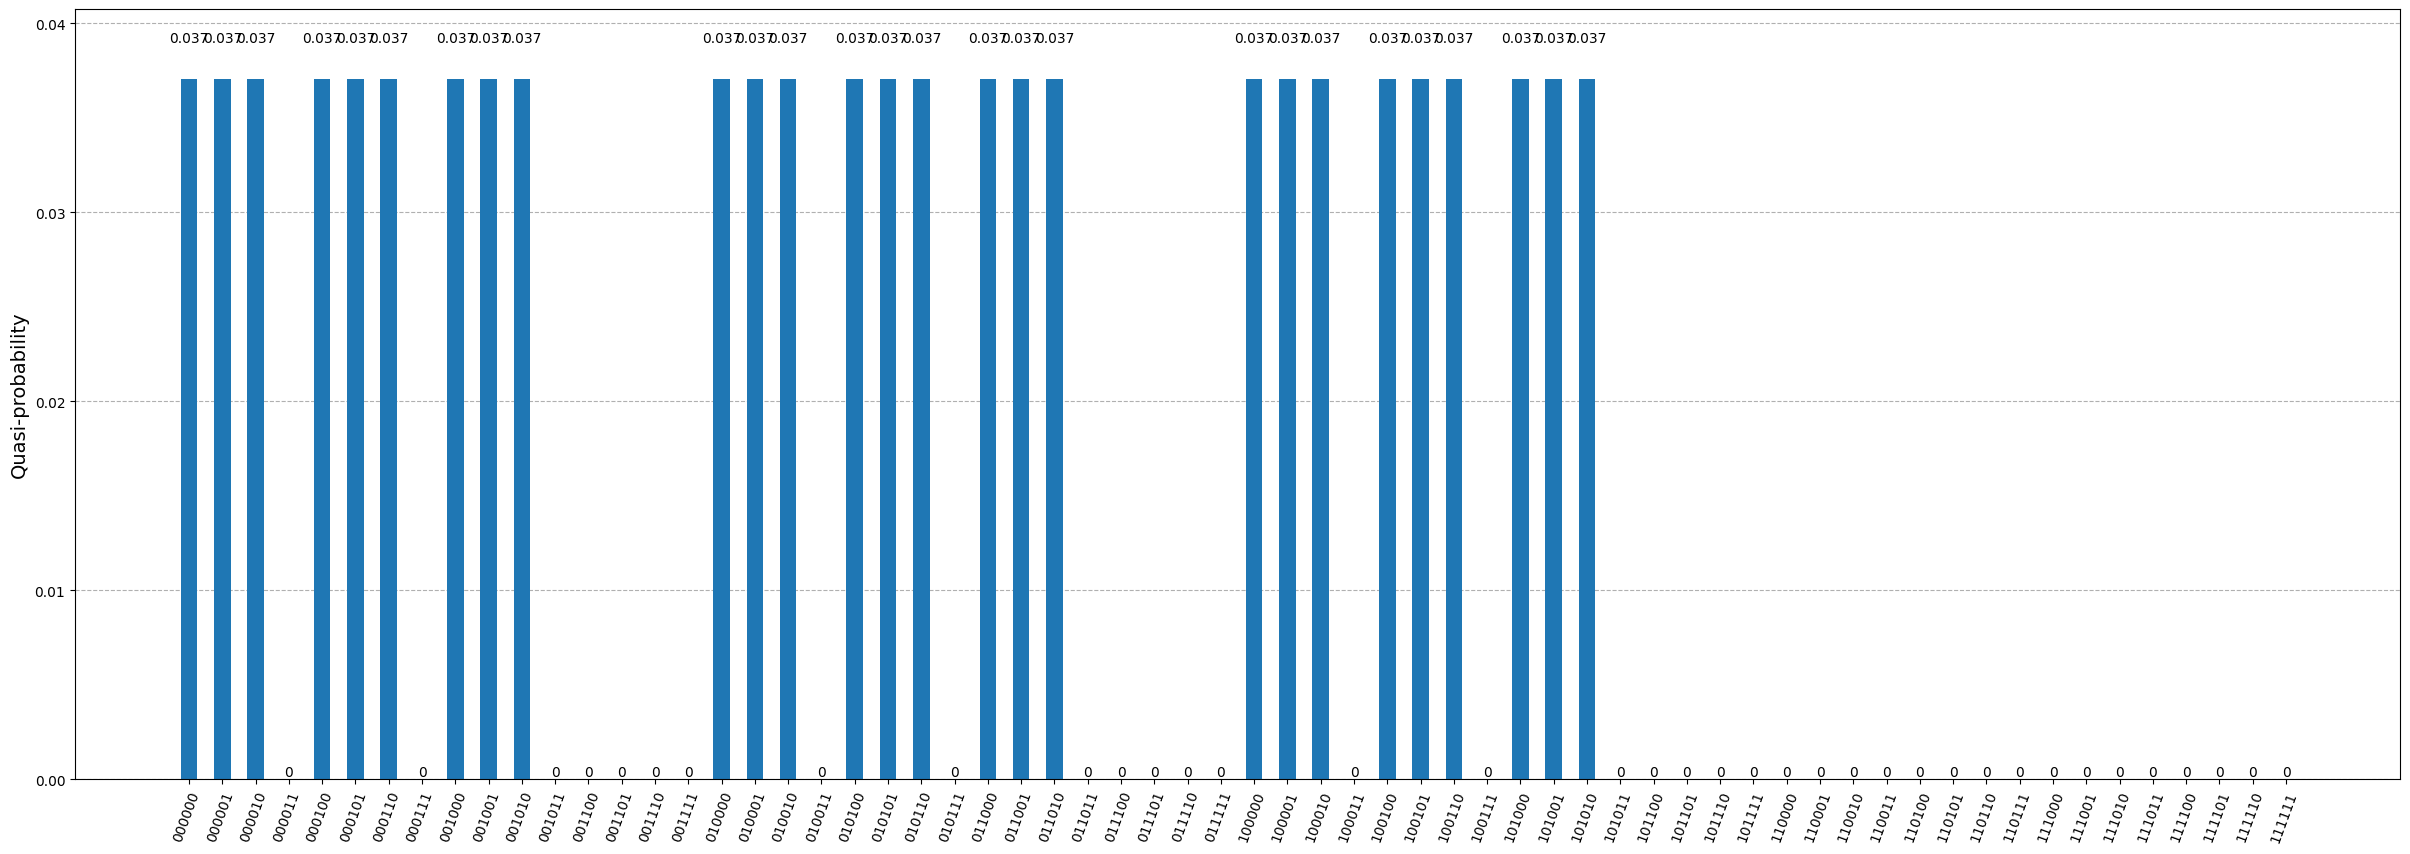

In [94]:
from qiskit.visualization import plot_histogram
plot_histogram(distrib, figsize=(30,10))

In [95]:
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

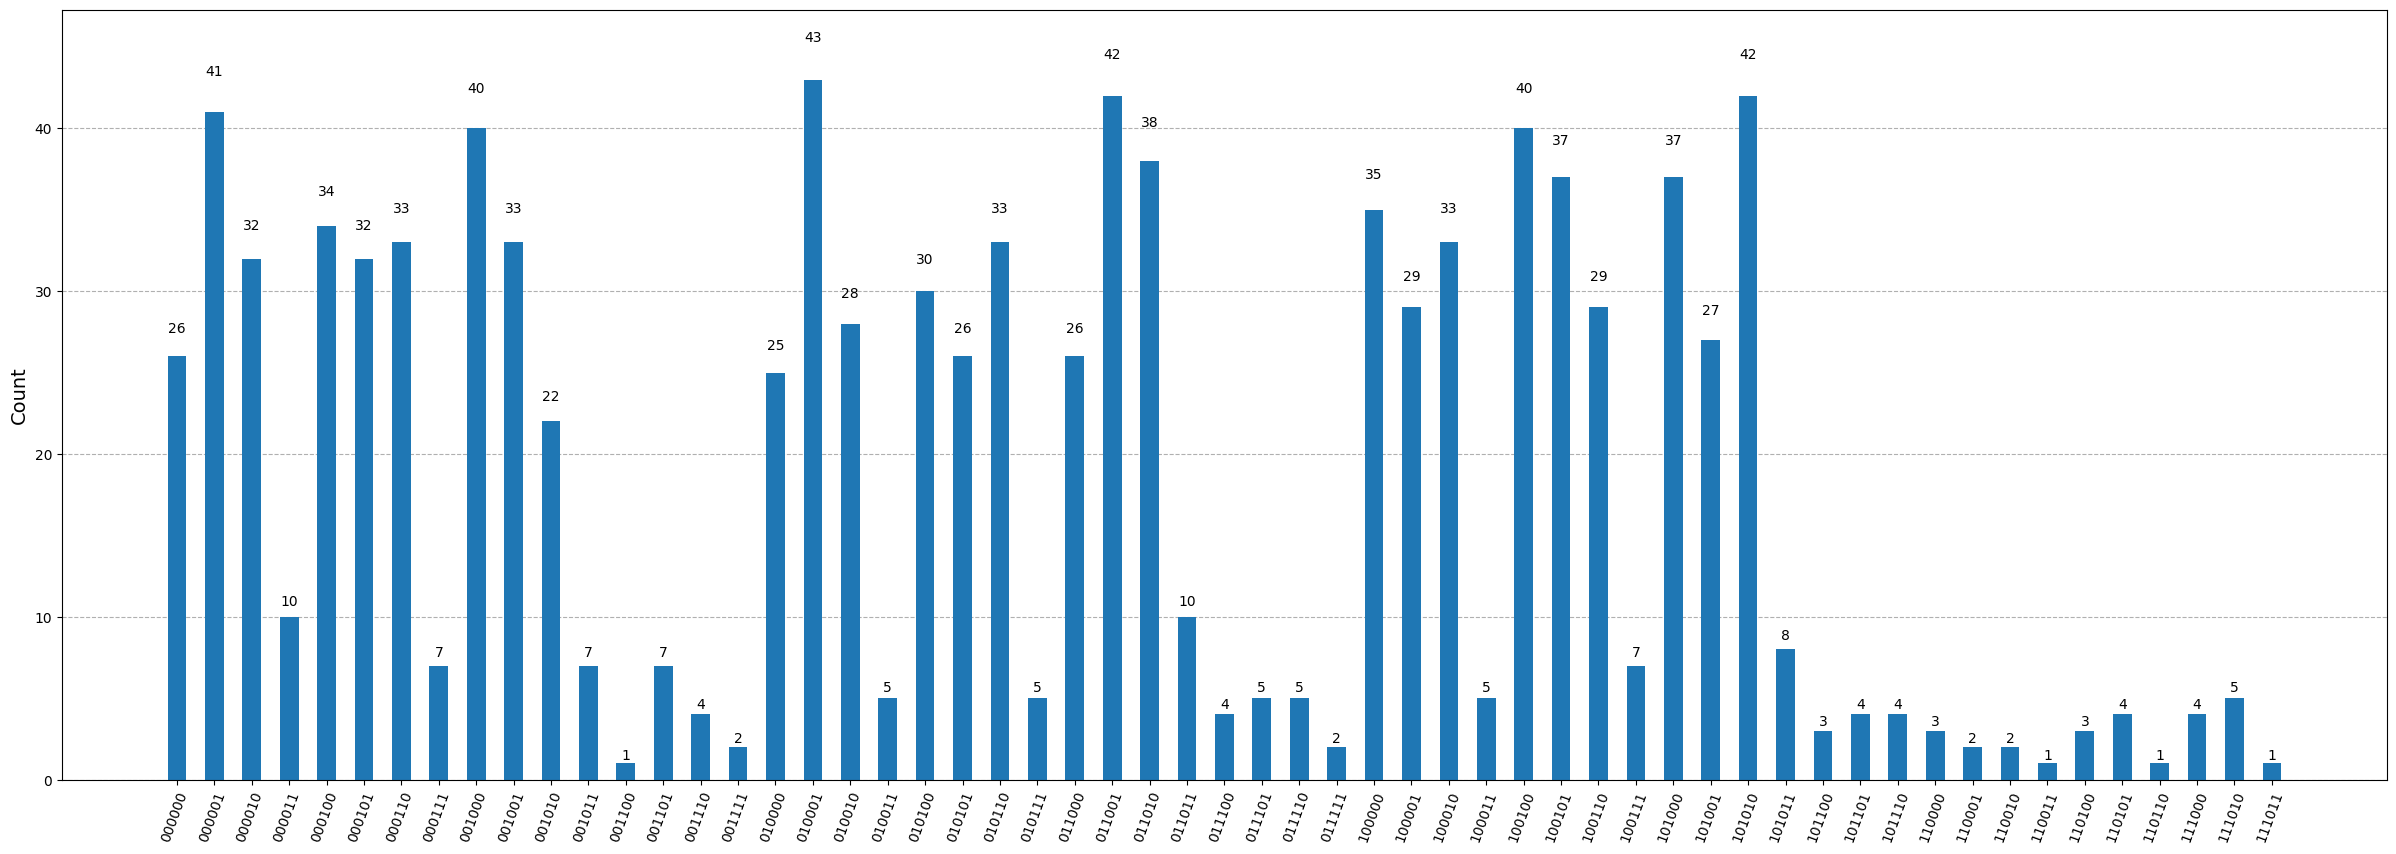

In [104]:
backendBrisbane_aer = AerSimulator.from_backend(backendBrisbane)
sampler = SamplerV2(backendBrisbane_aer)
job = sampler.run([transpiledBrisbane])
pub_result = job.result()[0]
countsbris = pub_result.data.meas.get_counts()
plot_histogram(countsbris, figsize=(30, 10))

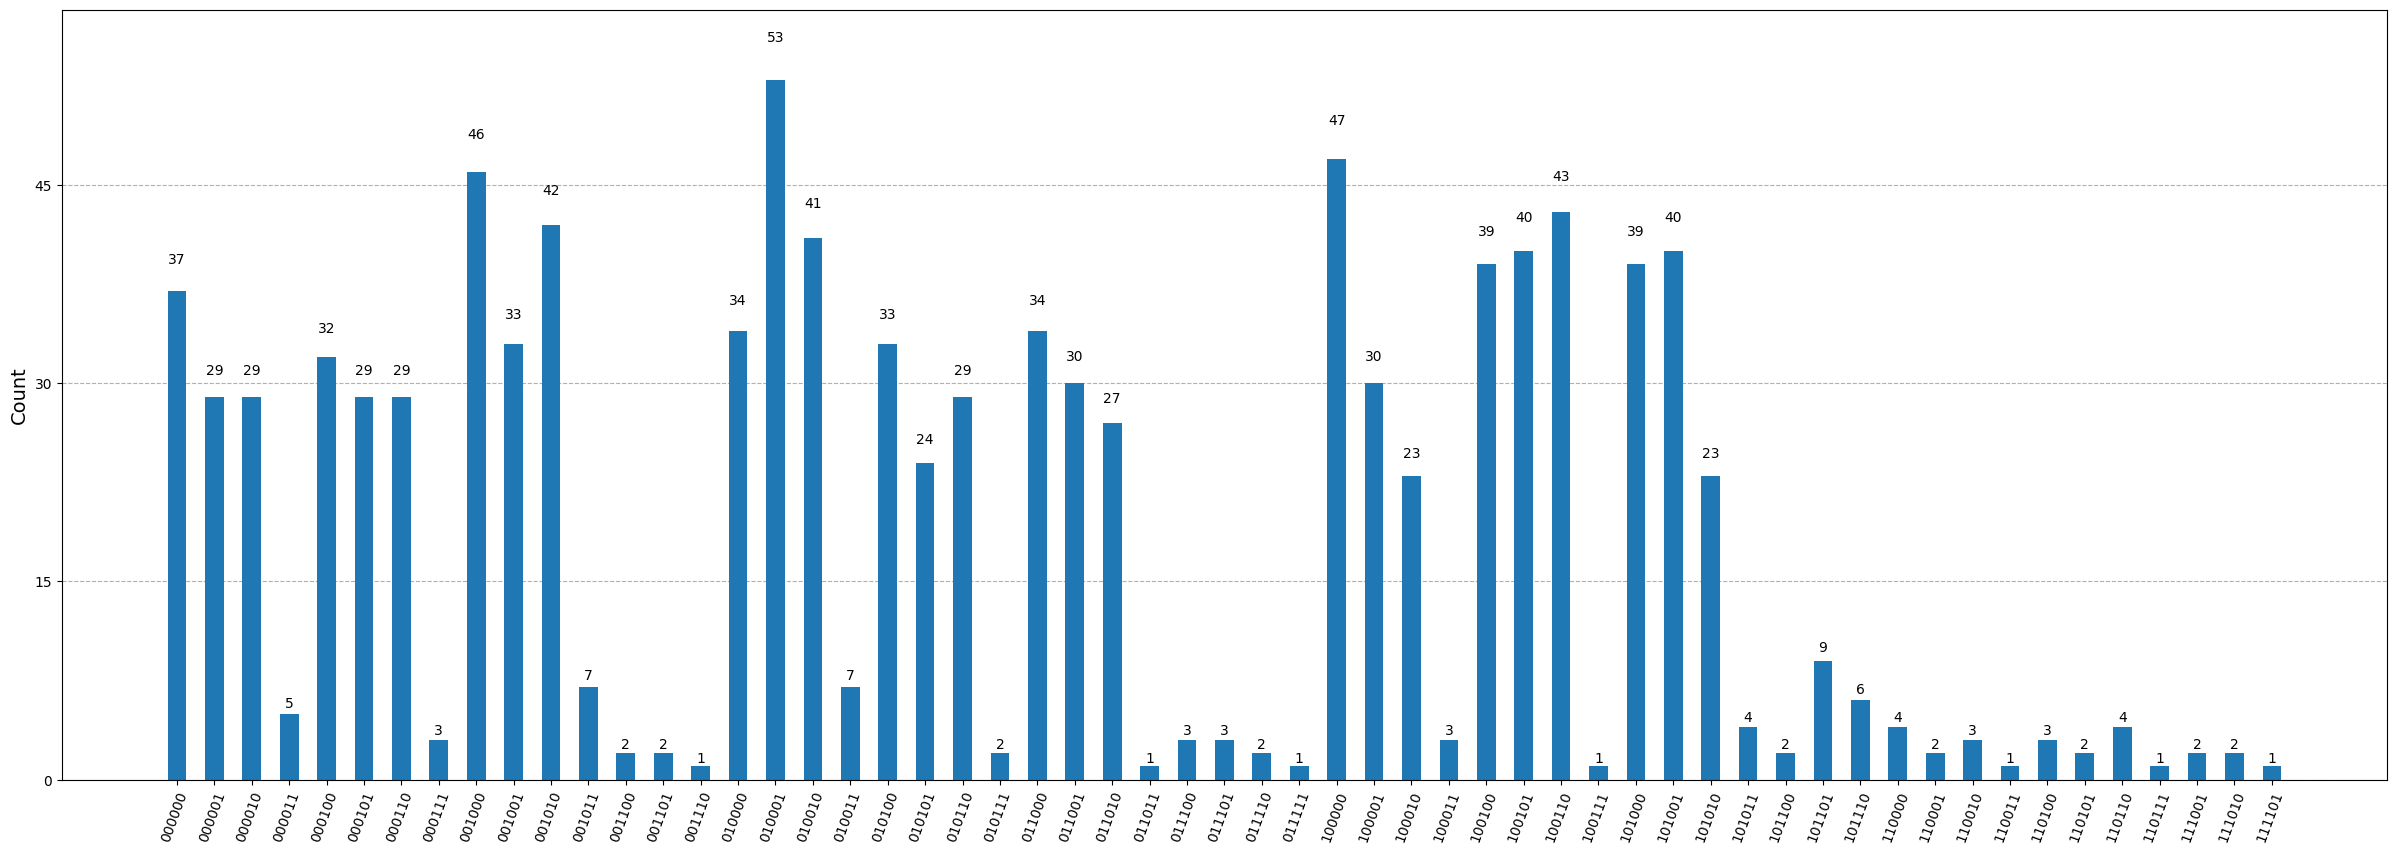

In [105]:
backendTorino_aer = AerSimulator.from_backend(backendTorino)
sampler = SamplerV2(backendTorino_aer)
job = sampler.run([transpiledTorino])
pub_result = job.result()[0]
countstor = pub_result.data.meas.get_counts()
plot_histogram(countstor, figsize=(30, 10))

In [101]:
from qiskit.quantum_info import state_fidelity, DensityMatrix

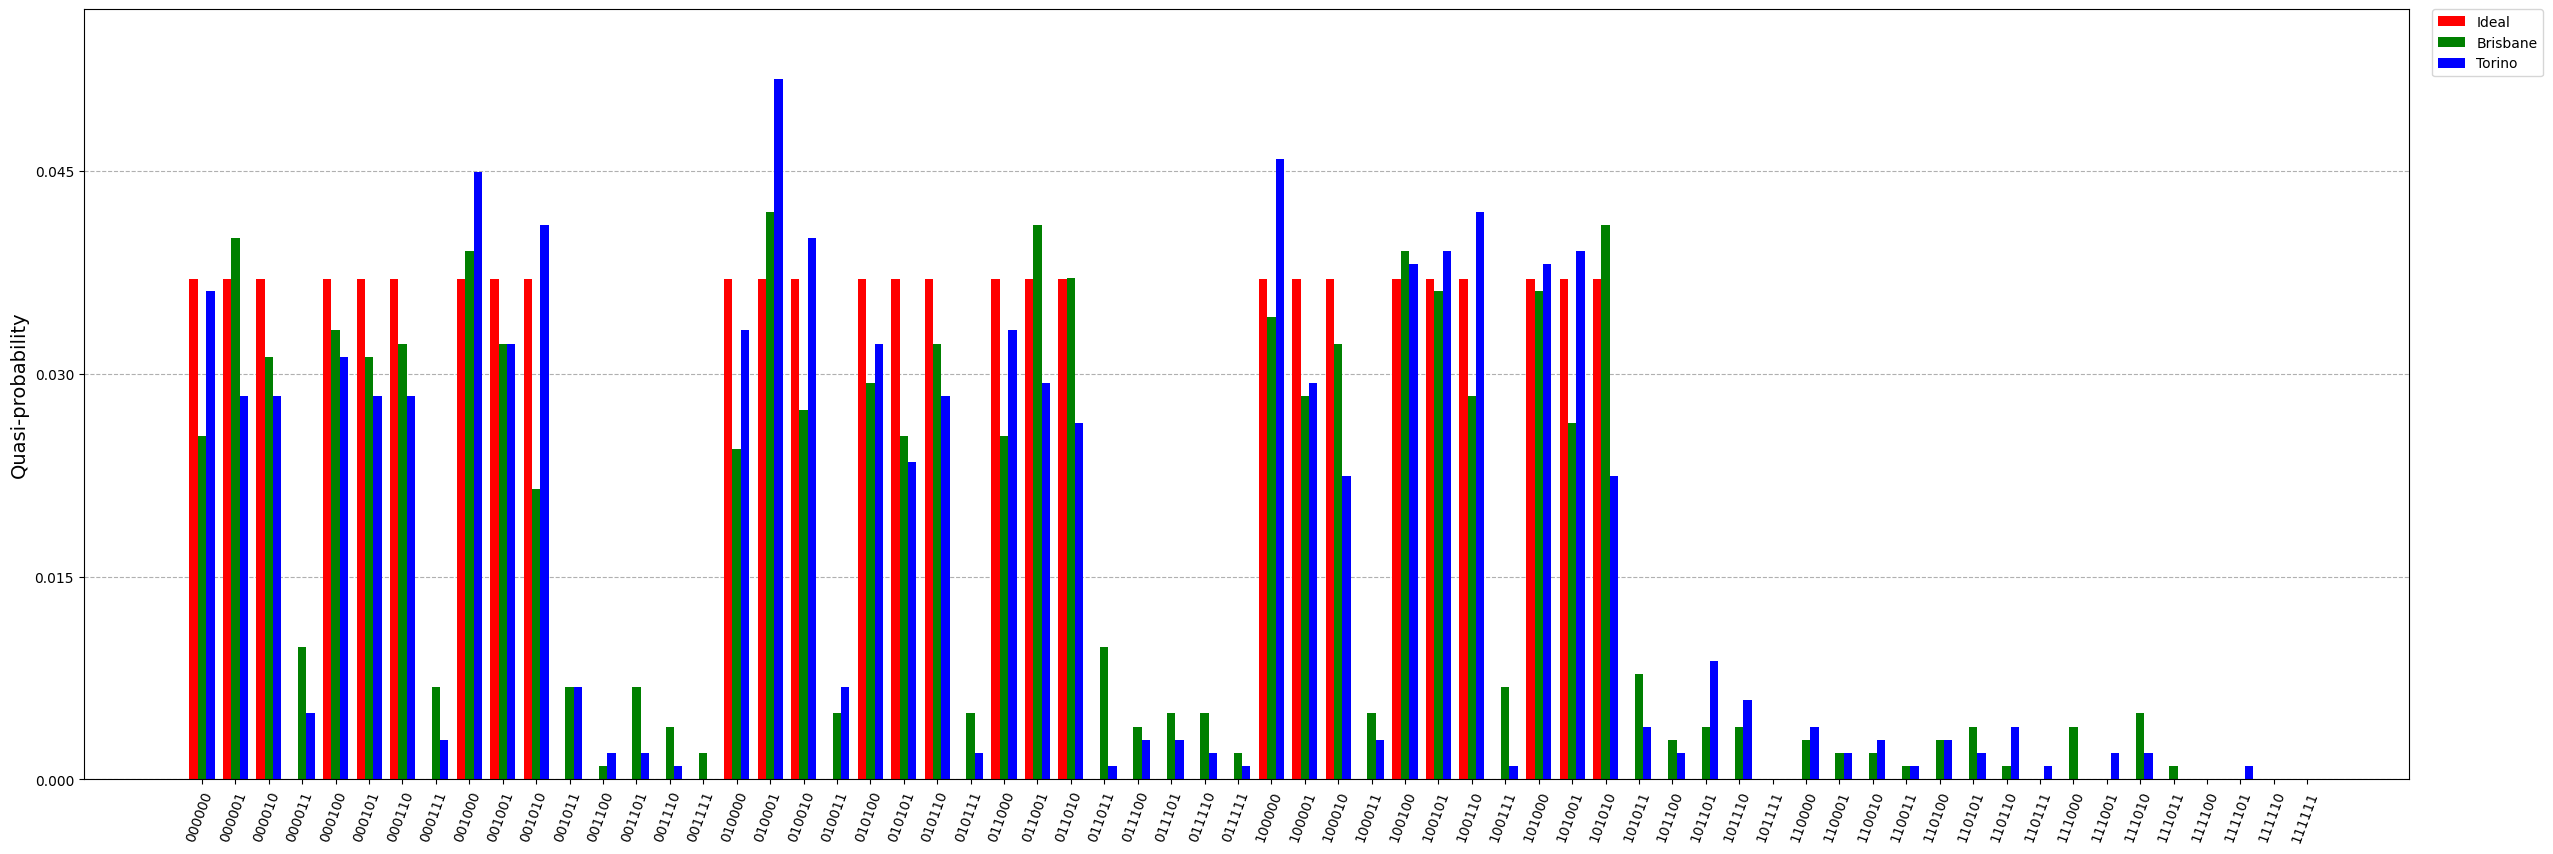

In [110]:
plot_histogram([distrib, countsbris, countstor], figsize=(30, 10), legend=["Ideal", "Brisbane", "Torino"], color=["red", "green", "blue"], bar_labels=False)